# Network Dynamics and Learning: Homework I
## Alessandro Casella (S306081)
## s306081@studenti.polito.it
### Politecnico di Torino

In [1]:
# https://networkx.org/
import networkx as nx

# https://docs.scipy.org/doc/scipy/reference/misc.html
import scipy.misc
# https://docs.scipy.org/doc/scipy/tutorial/io.html
from scipy import io

import numpy as np

# https://www.cvxpy.org/
import cvxpy as cp

# Exercise 1(a)

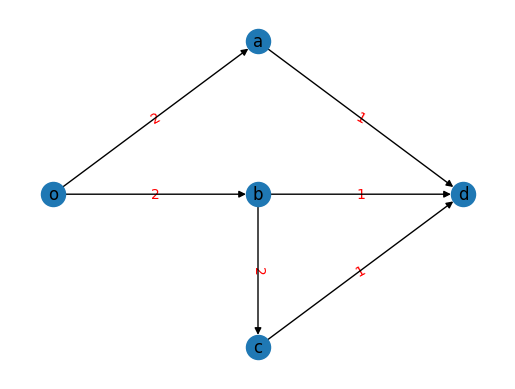

In [119]:
GG = nx.DiGraph()
GG.add_edge("o", "a", capacity=2)
GG.add_edge("o", "b", capacity=2)
GG.add_edge("a", "d", capacity=1)
GG.add_edge("b", "c", capacity=2)
GG.add_edge("b", "d", capacity=1)
GG.add_edge("c", "d", capacity=1)

pos = {'o': (40, 20), 'a': (60, 35), 'b': (60, 20), 'c': (60, 5), 'd': (80, 20)}

nx.draw_networkx_edge_labels(GG, pos, edge_labels={("o","a"):'2',
("o","b"):'2', ("a","d"):'1', ("b","c"):'2',
("b","d"):'1', ("c","d"):'1'}, font_color='red')

nx.draw(GG, pos, with_labels = True)

In [37]:
nx.algorithms.flow.maximum_flow(GG,'o','d')

(3,
 {'o': {'a': 1, 'b': 2},
  'a': {'d': 1},
  'b': {'c': 1, 'd': 1},
  'd': {},
  'c': {'d': 1}})

In [53]:
nx.algorithms.flow.minimum_cut(GG,'o','d')

(3, ({'a', 'b', 'c', 'o'}, {'d'}))

 The minimal capacity that needs to be removed equals the capacity of the min-cut of the network, which is 3.

# Exercise 1(b)

We want that the throughput does not change, this means that the min-cut capacity must remain = 3. Since what we can do is only to remove capacity (not add), we cannot find another path, different from the one we found, in which the flow is equal 3.
Taking care of this, to satisfy the static condition of throughput, we cannot change the capacities ad,bd,cd and also we cannot disconnect the components 'a','b','c','o'.
The consequence of this latter observation is that the capacities oa,ob,oc cannot be taken to 0. So we can remove capacities on oa,ob,bc.

In [73]:
GG['o']['a']['capacity'] = 1
GG['o']['b']['capacity'] = 2
GG['b']['c']['capacity'] = 1

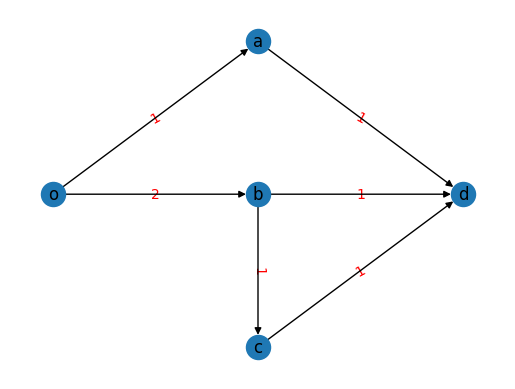

In [74]:
nx.draw_networkx_edge_labels(GG, pos, edge_labels={("o","a"):GG['o']['a']['capacity'],
("o","b"):GG['o']['b']['capacity'], ("a","d"):GG['a']['d']['capacity'], ("b","c"):GG['b']['c']['capacity'],
("b","d"):GG['b']['d']['capacity'], ("c","d"):GG['c']['d']['capacity']}, font_color='red')
nx.draw(GG, pos, with_labels = True)

To guarantee that the min-cut capacity is still 3, we remove 1 unit in oa and 1 unit in bc.
If we removed 1 unit also in ob, the min cut capacity would be 2, not 3 anymore.

# Exercise 1(c)

In [105]:
"""We have 6 edges in which we distribute a total of x
n=6 edges, M=x=3 for example
We know that we can make
(M+n-1) C (n-1) different distributions of capacities to the edges
(3+6-1) C (6-1) = 8 C 5 = 56
"""

from itertools import product

# initialize lists
edges = ['oa', 'ob', 'ad', 'bd', 'bc', 'cd']
poss_choices = [0,1,2,3]

combs = list(list(zip(edges, element)) for element in product(poss_choices, repeat=len(edges)))

In [125]:
all_combs = list(product(poss_choices, repeat=len(edges)))
filtered_combs = []
for row in all_combs:
    row_sum = 0
    for elem in row:
        row_sum += elem
    if row_sum == 3:
        filtered_combs.append(row)

print(len(filtered_combs))

56


In [127]:
combs = list(list(zip(edges, element)) for element in filtered_combs)
combs

[[('oa', 0), ('ob', 0), ('ad', 0), ('bd', 0), ('bc', 0), ('cd', 3)],
 [('oa', 0), ('ob', 0), ('ad', 0), ('bd', 0), ('bc', 1), ('cd', 2)],
 [('oa', 0), ('ob', 0), ('ad', 0), ('bd', 0), ('bc', 2), ('cd', 1)],
 [('oa', 0), ('ob', 0), ('ad', 0), ('bd', 0), ('bc', 3), ('cd', 0)],
 [('oa', 0), ('ob', 0), ('ad', 0), ('bd', 1), ('bc', 0), ('cd', 2)],
 [('oa', 0), ('ob', 0), ('ad', 0), ('bd', 1), ('bc', 1), ('cd', 1)],
 [('oa', 0), ('ob', 0), ('ad', 0), ('bd', 1), ('bc', 2), ('cd', 0)],
 [('oa', 0), ('ob', 0), ('ad', 0), ('bd', 2), ('bc', 0), ('cd', 1)],
 [('oa', 0), ('ob', 0), ('ad', 0), ('bd', 2), ('bc', 1), ('cd', 0)],
 [('oa', 0), ('ob', 0), ('ad', 0), ('bd', 3), ('bc', 0), ('cd', 0)],
 [('oa', 0), ('ob', 0), ('ad', 1), ('bd', 0), ('bc', 0), ('cd', 2)],
 [('oa', 0), ('ob', 0), ('ad', 1), ('bd', 0), ('bc', 1), ('cd', 1)],
 [('oa', 0), ('ob', 0), ('ad', 1), ('bd', 0), ('bc', 2), ('cd', 0)],
 [('oa', 0), ('ob', 0), ('ad', 1), ('bd', 1), ('bc', 0), ('cd', 1)],
 [('oa', 0), ('ob', 0), ('ad', 1),

In [118]:
comb_ok = []

for row in combs:
    tot_value = 0
    for edge,value in row:
        tot_value += value
    if tot_value == 3:
        comb_ok.append(row)

print(len(comb_ok))
print(comb_ok[0])

56
[('oa', 0), ('ob', 0), ('ad', 0), ('bd', 0), ('bc', 0), ('cd', 3)]


In [237]:
from itertools import product

edges = ['oa', 'ob', 'ad', 'bd', 'bc', 'cd']
# The possible associations for when I put a capacity of x
# are accessible by associations[x-1]
associations = []

for x in np.arange(2,17): # np.arange(a,b) ->  a-1 <= x <= b-2
    poss_choices = np.arange(0,x) #1st: [0,1], 2nd: [0,1,2] ...
    # cartesian product
    all_combs = list(product(poss_choices, repeat=len(edges)))
    filtered_combs = []
    for row in all_combs:
        row_sum = 0
        for elem in row:
            row_sum += elem
        if row_sum == x-1:
            filtered_combs.append(row)
    poss_associations = list(list(zip(edges, element)) for element in filtered_combs)
    associations.append(poss_associations)

In [221]:
# I want to access the possible associations for a capacity=3
# associations[9][:5]

[[('oa', 0), ('ob', 0), ('ad', 0), ('bd', 0), ('bc', 0), ('cd', 10)],
 [('oa', 0), ('ob', 0), ('ad', 0), ('bd', 0), ('bc', 1), ('cd', 9)],
 [('oa', 0), ('ob', 0), ('ad', 0), ('bd', 0), ('bc', 2), ('cd', 8)],
 [('oa', 0), ('ob', 0), ('ad', 0), ('bd', 0), ('bc', 3), ('cd', 7)],
 [('oa', 0), ('ob', 0), ('ad', 0), ('bd', 0), ('bc', 4), ('cd', 6)]]

In [238]:
max_ths = []
for i, x in enumerate(associations):
    max_th = 0
    cut = tuple()
    for row in x:
        GG = nx.DiGraph()
        GG.add_edge("o", "a", capacity=2)
        GG.add_edge("o", "b", capacity=2)
        GG.add_edge("a", "d", capacity=1)
        GG.add_edge("b", "c", capacity=2)
        GG.add_edge("b", "d", capacity=1)
        GG.add_edge("c", "d", capacity=1)
        for edge, capacity in row:
            if capacity > 0:
                GG[edge[0]][edge[1]]['capacity'] = list(GG.get_edge_data(edge[0],edge[1]).values())[0] + capacity
        min_cut = nx.algorithms.flow.minimum_cut(GG,'o','d')
        throughput = min_cut[0]
        if throughput > max_th:
            oa=GG.get_edge_data("o", "a")
            ob=GG.get_edge_data("o", "b")
            ad=GG.get_edge_data("a", "d")
            bc=GG.get_edge_data("b", "c")
            bd=GG.get_edge_data("b", "d")
            cd=GG.get_edge_data("c", "d")
            max_th = throughput
            cut = min_cut[1]
    max_ths.append({i+1: max_th})
    print(f"--- Assigned x={i+1} extra unit of capacity ---")
    print("New configuration of edges:")
    print(f"- oa: {oa}")
    print(f"- ob: {ob}")
    print(f"- ad: {ad}")
    print(f"- bc: {bc}")
    print(f"- bd: {bd}")
    print(f"- cd: {cd}")
    print(f"Max throughput={max_th} obtained with cut {cut}")
    print("\n")

--- Assigned x=1 extra unit of capacity ---
New configuration of edges:
- oa: {'capacity': 2}
- ob: {'capacity': 2}
- ad: {'capacity': 2}
- bc: {'capacity': 2}
- bd: {'capacity': 1}
- cd: {'capacity': 1}
Max throughput=4 obtained with cut ({'o', 'c', 'b', 'a'}, {'d'})


--- Assigned x=2 extra unit of capacity ---
New configuration of edges:
- oa: {'capacity': 2}
- ob: {'capacity': 2}
- ad: {'capacity': 2}
- bc: {'capacity': 2}
- bd: {'capacity': 1}
- cd: {'capacity': 2}
Max throughput=4 obtained with cut ({'o', 'a'}, {'d', 'c', 'b'})


--- Assigned x=3 extra unit of capacity ---
New configuration of edges:
- oa: {'capacity': 2}
- ob: {'capacity': 3}
- ad: {'capacity': 2}
- bc: {'capacity': 2}
- bd: {'capacity': 1}
- cd: {'capacity': 2}
Max throughput=5 obtained with cut ({'o', 'c', 'b', 'a'}, {'d'})


--- Assigned x=4 extra unit of capacity ---
New configuration of edges:
- oa: {'capacity': 2}
- ob: {'capacity': 3}
- ad: {'capacity': 2}
- bc: {'capacity': 2}
- bd: {'capacity': 1}
- cd:

In [241]:
max_ths

[{1: 4},
 {2: 4},
 {3: 5},
 {4: 5},
 {5: 6},
 {6: 6},
 {7: 7},
 {8: 7},
 {9: 8},
 {10: 8},
 {11: 9},
 {12: 9},
 {13: 10},
 {14: 10},
 {15: 11}]

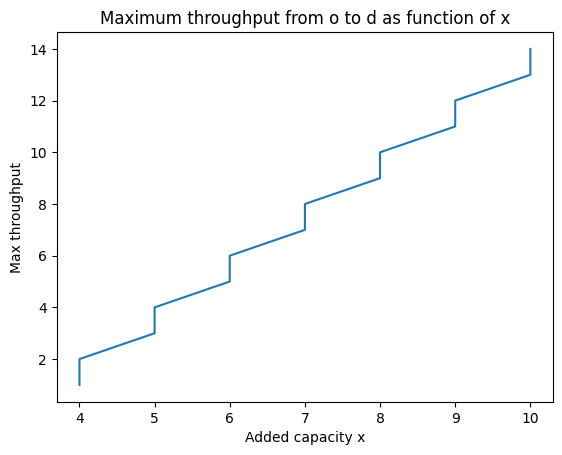

In [246]:
import matplotlib.pyplot as plt

x = [list(mt.values())[0] for mt in max_ths[:-1]]
plt.plot(x, np.arange(1,15))
plt.xlabel('Added capacity x')
plt.ylabel('Max throughput')
plt.title('Maximum throughput from o to d as function of x')
plt.show()